**Learner Name: Damian Najera**

# Introduction to Computer Vision: Twitter US Airline Sentiment

## Problem Statement

### Context

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

### Objective

The aim of this project is to build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing necessary libraries

In [95]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib
import warnings                                         # Import warnings

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                                              # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize                         # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer                                # Import Lemmatizer.
from wordcloud import WordCloud,STOPWORDS                                      # Import WorldCloud and Stopwords
from sklearn.feature_extraction.text import CountVectorizer                    # Import count Vectorizer
from sklearn.model_selection import train_test_split                           # Import train test split
from sklearn.ensemble import RandomForestClassifier                            # Import Rndom Forest Classifier
from sklearn.model_selection import cross_val_score                            # Import cross val score
from sklearn.metrics import confusion_matrix                                   # Import confusion matrix
from wordcloud import WordCloud                                                # Import Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer                    # Import Tf-Idf vector
import nltk                                                                    # Import nltk
nltk.download('omw-1.4')

from tensorflow.keras import backend                                           # Import backend
import random                                                                  # Import random
import tensorflow as tf                                                        # Import tensorflow
from sklearn.preprocessing import LabelBinarizer                               # Import Label Binarizer
from tensorflow.keras.layers import Dropout                                    # Import Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

# Suppress the MarkupResemblesLocatorWarning
warnings.filterwarnings('ignore', category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\BD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Loading the dataset

In [3]:
data = pd.read_csv("Tweets.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

### Check the head and tail of the data

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


### Understand the shape of the dataset

In [6]:
data.shape

(14640, 15)

### Check for Duplicate Entries

In [7]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 36


Given the context of our problem and the understanding of our dataset, let us remove the duplicate entries to ensure we are working with unique tweets.

In [8]:
# Removing duplicate rows
data.drop_duplicates(inplace=True)

# Verifying that duplicates have been removed
remaining_duplicates = data.duplicated().sum()

remaining_duplicates

0

In [9]:
data.shape

(14604, 15)

### Checking for Missing Values

In [10]:
# Check for total missing values in each column
missing_values = data.isnull().sum()

# Display the columns with their respective count of missing values
missing_values

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

#### Observations:
- `negativereason`: 5,445 missing values. This is expected since not every tweet will be negative, and thus won't have a reason associated with it.
- `negativereason_confidence`: 4,101 missing values. Similar to the previous point, not every tweet will have a negative reason confidence if it's not negative.
- `airline_sentiment_gold`: 14,564 missing values. This column seems to represent some gold standard for sentiment, but it's mostly missing. Given its high count of missing values, it might not be very useful for analysis or modeling.
- `negativereason_gold`: 14,572 missing values. Like airline_sentiment_gold, this column has a high number of missing values, which makes it less useful.
- `tweet_coord`: 13,589 missing values. This indicates that a large portion of tweets do not have geolocation data associated with them.
- `tweet_location`: 4,723 missing values. This suggests that many users have not specified a location in their tweets or profiles.
- `user_timezone`: 4,814 missing values. A significant number of users haven't set or provided their timezones.

## Exploratory Data Analysis

### Univariate Analysis

In [11]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top and a summary of the information.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    value_counts = data[feature].value_counts()[:n]  # Get counts for top n categories
    categories = value_counts.index.tolist()  # Get the category names
    counts = value_counts.values.tolist()  # Get the count for each category
    percentages = [100 * count / total for count in counts]  # Calculate percentages

    plt.figure(figsize=(len(categories) + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=categories
    )

    for i, p in enumerate(ax.patches):
        label = "{:.1f}%".format(percentages[i]) if perc else counts[i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

#### Percentage of tweets for each airline



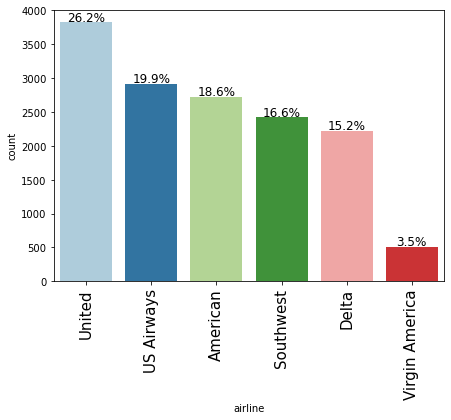

In [12]:
labeled_barplot(data, "airline", perc=True)

#### Observations:
-United has the highest percentage of tweets at approximately 26.7%, indicating that it is the most discussed airline on Twitter within this dataset.

-Virgin America has the lowest percentage of tweets at about 3.5%, suggesting that it has the least Twitter mentions among the airlines in this dataset.

-The top three airlines, United, US Airways, and American, account for over 64.8% of the tweets, showing that a significant portion of the conversation is concentrated around these airlines.

-Southwest and Delta also have a considerable share of Twitter mentions, with 16.6% and 15.2% respectively, indicating that they are also prominent in the Twitter discourse related to airlines.

#### Distribution of sentiments across all the tweets

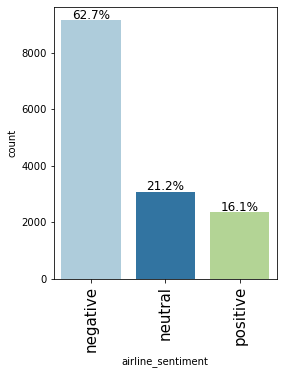

In [13]:
labeled_barplot(data, "airline_sentiment", perc=True)

#### Observations:
- The majority of the tweets, approximately 62.72%, have a negative sentiment. This is a significant portion and suggests that most of the conversations about airlines on Twitter within this dataset are complaints or expressions of dissatisfaction.

- Around 21.17% of the tweets are neutral. These could be questions, statements of fact, or tweets that do not express a clear positive or negative sentiment.

- Positive sentiments account for about 16.12% of the tweets. While this is the smallest proportion, it indicates that there is a presence of positive feedback or compliments among the tweets.

#### Plot of all the negative reasons

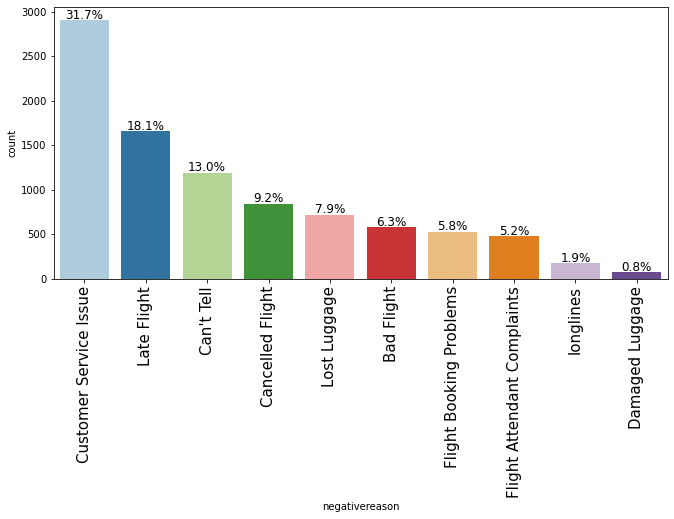

In [14]:
# Filter out the data to include only negative tweets with a specified negative reason
negative_data = data[(data['airline_sentiment'] == 'negative') & (data['negativereason'].notna())]

# Now plot the barplot with the filtered data
labeled_barplot(negative_data, "negativereason", perc=True)

#### Observations:
- The most common negative reason, accounting for approximately 31.7% of the negative tweets, is "Customer Service Issue." This indicates that customer service is a significant area where passengers feel airlines are lacking.
- "Late Flight" is the second most frequent complaint with 18.1% of the negative tweets. This suggests that timeliness is a critical factor negatively impacting passenger satisfaction.
- "Can't Tell" comes in third at about 13.0%, indicating that a considerable number of tweets express dissatisfaction without specifying a clear reason, or the reason is not easily inferred from the tweet.
- "Cancelled Flight" is the fourth most common complaint, making up 9.2% of negative tweets. This reflects the significant impact of cancellations on passenger discontent.
- "Lost Luggage" (7.9%) and "Damaged Luggage" (0.8%) together show that luggage handling is another notable area for customer grievances.
- "Bad Flight" at 6.3% and "Flight Attendant Complaints" at 5.2% suggest that the in-flight experience and interactions with the flight crew are also sources of negative feedback.
- "Flight Booking Problems" represent 5.8% of the negative reasons, while "longlines" are mentioned in 1.9% of the tweets, pointing to dissatisfaction with the booking process and check-in procedures.

### Bivariate Analysis

#### Distribution of Sentiment of tweets for each airline

<AxesSubplot:xlabel='airline'>

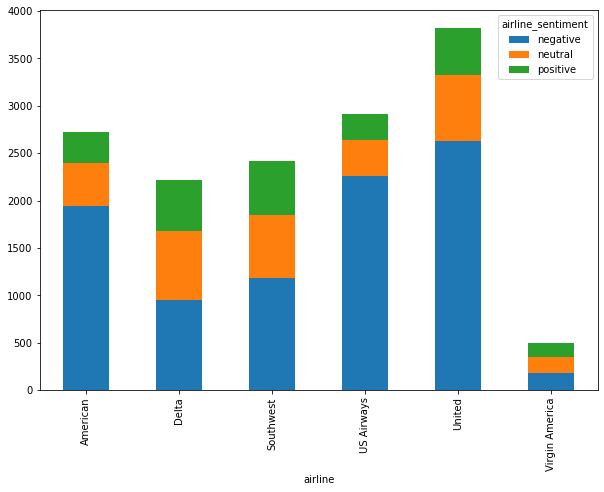

In [15]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).size().unstack()
airline_sentiment.plot(kind='bar', figsize=(10, 7), stacked=True)

#### Observations:
- United, US Airways, and American have a notably higher proportion of negative tweets compared to other sentiments.
- Southwest and Virgin America have a more balanced distribution of sentiments, with a relatively higher proportion of neutral and positive tweets.
- Delta seems to have a smaller proportion of negative tweets compared to United, US Airways, and American.
- Virgin America has the smallest overall number of tweets, which could indicate either less customer engagement on Twitter or a smaller customer base.

In general, every airline has more negative tweets than positive or neutral, with negative sentiment being the most common. However, the balance between neutral and positive varies, with some airlines having a comparable number of neutral and positive tweets, while others have more neutral than positive.

#### Wordcloud for negative tweets

In [16]:
airline_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

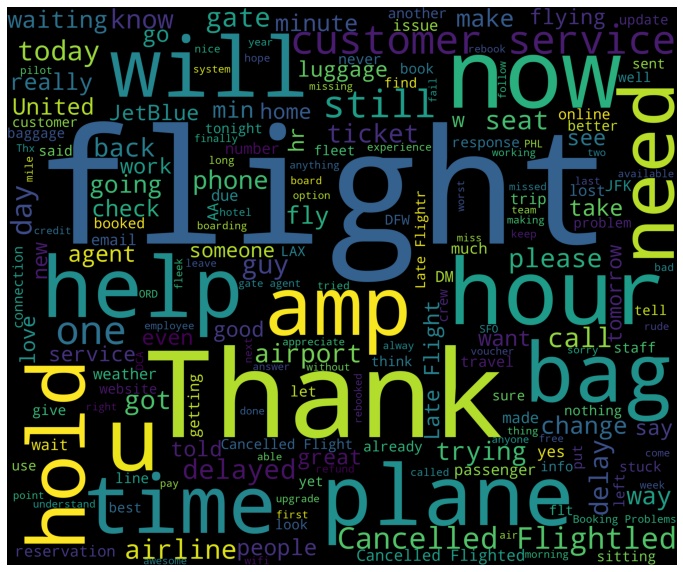

In [18]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Wordcloud for positive tweets

In [19]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

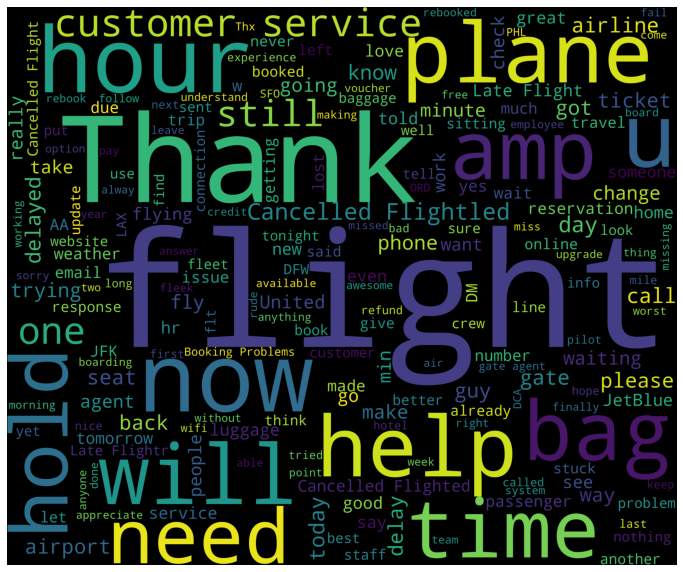

In [21]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Data Preparation for Modeling



- Drop all unnecessary columns
- Remove html tags
- Replace contractions in string(e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatized data

### Drop all unnecessary columns

In [22]:
# Take text and airline sentiment columns from the data
data = data[['text', 'airline_sentiment']]

In [23]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [24]:
data.shape

(14604, 2)

In [25]:
data['text'].unique()

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [26]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

### Remove HTML Tages

In [27]:
# Code to remove the html tage
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(strip_html)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Replace contractions in string

In [28]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head() 

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Remove numbers

In [29]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)  # Replace one or more digits with nothing
    return text

data['text'] = data['text'].apply(remove_numbers)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


### Apply Tokenization

In [30]:
data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, have, added, com...
2        [@, VirginAmerica, I, did, not, today, ..., Mu...
3        [@, VirginAmerica, it, is, really, aggressive,...
4        [@, VirginAmerica, and, it, is, a, really, big...
                               ...                        
14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Length: 14604, dtype: object

In [31]:
# Complete the code to apply tokenization on text column
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# Complete the code to display the head of the data
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


### Applying lowercase and removing stopwords and punctuation

**Adding Stopwords**

In [32]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

**All the preprocessing steps in one function**

In [33]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


## Model Building

### Using countvectorizer

In [34]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=5000)
# Fit and transform the CountVectorizer on the 'text' column
data_features = Count_vec.fit_transform(data['text'])

# Convert the dataframe to array
data_features = data_features.toarray()

In [35]:
data_features.shape

(14604, 5000)

#### Create train and test sets

In [36]:
# Assign the independent variable (data_features) to X
X = data_features

# Assign the dependent variable (airline_sentiment) to y
y = data['airline_sentiment']

In [37]:
# Split data into training and testing set with 30% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Random Forest Model

In [38]:
# Using Random Forest to build model for the classification of reviews.

forest = RandomForestClassifier(n_estimators=100, n_jobs=4)   # Initialize the Random Forest Classifier with 100 trees and parallel jobs
forest = forest.fit(X_train, y_train)                         # Fit the forest variable on X_train and y_train
print(forest)

# Calculate cross validation score
cross_val_scores = cross_val_score(forest, X, y, cv=10)                # Perform 10-fold cross validation
print(np.mean(cross_val_scores))     

RandomForestClassifier(n_jobs=4)
0.7328098131323076


#### Observations:
- The average accuracy of approximately 73.28% suggests that the model has a reasonable ability to classify the sentiments correctly based on the tweet text data.
- This accuracy can be considered as a baseline performance for the Random Forest model on this dataset.

#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [41]:
# Finding optimal number of base learners using k-fold CV
base_ln = [x for x in range(1, 25)]

In [42]:
# K-Fold Cross-validation
cv_scores = []  # Initializing an empty list to store the scores
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b, random_state=42, n_jobs=-1)  # Instantiate RandomForestClassifier with b trees
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  # Calculate 5-fold cross-validation score for accuracy
    cv_scores.append(scores.mean())  # Append the mean of the scores to the cv_scores list

In [44]:
cv_scores

[0.6548593533940353,
 0.7030901104789976,
 0.7053408867985014,
 0.7206028258508415,
 0.7255909836889172,
 0.7309728276211848,
 0.7348853343795902,
 0.7373313747912669,
 0.7389941100196651,
 0.7432981975990315,
 0.7413423509203393,
 0.7422225943664802,
 0.7432009722534557,
 0.7440815984765476,
 0.7468203197144485,
 0.7465273039583921,
 0.7471142445657635,
 0.7482887477930517,
 0.7487775539595883,
 0.7491689912391924,
 0.7506362231398235,
 0.7511250771534792,
 0.7510277561136656,
 0.7524950358614155]

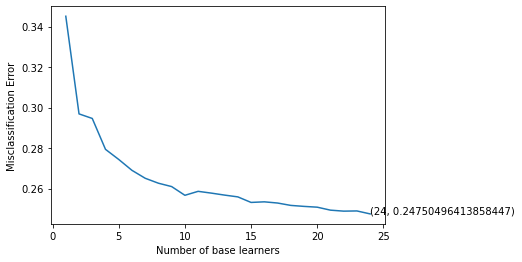

In [43]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

#### Observations:
- The scores generally increase with the number of trees, which suggests that having more trees in the forest improves the model's performance up to a certain point.
- The score seems to plateau after a certain number of trees, indicating that adding more trees beyond this point does not significantly improve the model's performance.
- The highest cross-validation score in the list is approximately 0.7525, corresponding to 24 trees.

In [54]:
# Train the best model and calculate accuracy on test data.
clf = RandomForestClassifier(n_estimators=24, random_state=42, n_jobs=-1)  # Initialize the Random Forest classifier with 24 trees
clf.fit(X_train, y_train)                                                  # Fit the classifier on X_train and y_train
train_accuracy = clf.score(X_train, y_train)
train_accuracy

0.9930541968303659

#### Observations:
A training accuracy of approximately 99.31% indicates that the Random Forest classifier is able to classify the sentiment of the tweets in the training set with a very high level of accuracy. 

#### Best Random Forest model

In [57]:
  # Predict the result for test data using the model built above.
result = clf.predict(X_test)  

In [58]:
# Print and plot Confusion matrix
conf_mat = confusion_matrix(y_test, result)  # Calculate the confusion matrix between y_test and result

print(conf_mat)  # Print confusion matrix

[[2544  192   60]
 [ 390  415   80]
 [ 200  120  381]]


<AxesSubplot:>

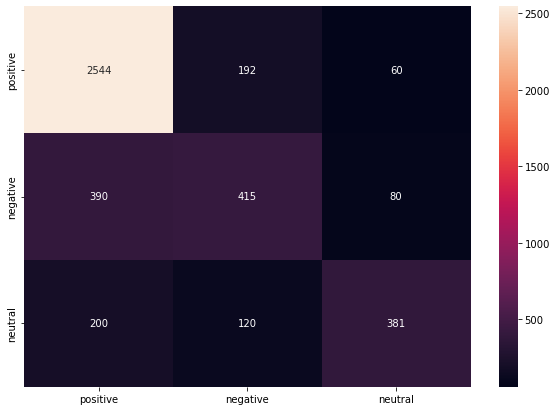

In [59]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observations:
- Negative sentiment tweets: 2544 were correctly predicted as negative.
- Neutral sentiment tweets: 415 were correctly predicted as neutral.
- Positive sentiment tweets: 381 were correctly predicted as positive.
- Negative sentiment tweets were misclassified as neutral 192 times and as positive 60 times.
- Neutral sentiment tweets were misclassified as negative 390 times and as positive 80 times.
- Positive sentiment tweets were misclassified as negative 200 times and as neutral 120 times.
- The model is best at predicting negative tweets, which is likely the majority class. 
- The model struggles more with neutral and positive tweets, which may be minority classes and/or have features that overlap with the negative class.

#### Wordcloud of top 40 important features from countvectorizer+Randomforest based mode

In [63]:
all_features = Count_vec.get_feature_names_out()                 # Instantiate the feature from the vectorizer
top_features=''                                                  # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Complete the code by applying wordcloud on top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features)

thank,not,jetblue,great,flight,delay,http,usairways,unite,southwestair,hours,love,cancel,hour,americanair,get,call,virginamerica,bag,hold,awesome,customer,time,follow,amaze,wait,best,help,service,please,go,dm,phone,still,would,lose,one,make,appreciate,guy,
 
 


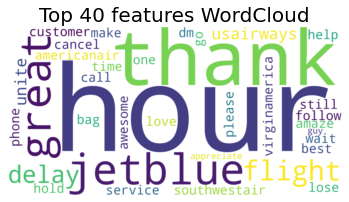

In [64]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Using TF-IDF (Term Frequency- Inverse Document Frequency)

In [66]:
# Initialize the TfidfVectorizer with max_features set to 5000
tfidf_vect = TfidfVectorizer(max_features=5000)

# Fit the TF-IDF vectorizer on the 'text' column of the data
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

In [67]:
data_features.shape

(14604, 5000)

#### Create train and test sets

In [68]:
X = data_features  # The independent variables (features) array
y = data['airline_sentiment']  # The dependent variable (target)

In [69]:
# Split data into training and testing set with a specified test size and random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # for example, 30% test data and random state 42

#### Random Forest Model

In [70]:
# Initialize the Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, n_jobs=4)

# Fit the forest variable on X_train and y_train
forest = forest.fit(X_train, y_train)

# Print the fitted model
print(forest)

# Calculate the mean of the cross-validation scores
cv_scores = cross_val_score(forest, X, y, cv=10)
print(np.mean(cv_scores))

RandomForestClassifier(n_jobs=4)
0.7287686234798835


#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [71]:
# K-Fold Cross-validation
cv_scores = []  # Initializing an empty list to store the scores
for b in base_ln:
    clf = RandomForestClassifier(n_estimators=b, random_state=42)  # Initialize the Random Forest Classifier
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  # Find the cross-validation score for accuracy
    cv_scores.append(scores.mean())  # Append the scores to the cv_scores list

In [72]:
cv_scores

[0.653592792310011,
 0.6972222833602075,
 0.7076902760300288,
 0.7190386078402289,
 0.724516193857387,
 0.7270601294743037,
 0.7332219292915276,
 0.7342008813439298,
 0.7403633510208183,
 0.7406567495538257,
 0.7429066646251895,
 0.7445696390891822,
 0.7454505045478687,
 0.746428547505012,
 0.7466245293039679,
 0.7475047727501088,
 0.7489722438863344,
 0.7502440203063173,
 0.7498529179565452,
 0.749755022751305,
 0.7494617677596545,
 0.7493636333188197,
 0.7487766927114483,
 0.7482871688381284]

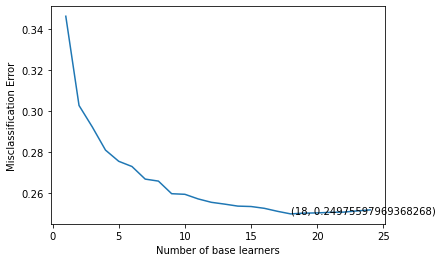

In [74]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

#### Observations:
The highest cross-validation score in the list is 0.7502440203063173, which corresponds to 18 trees. We will use this value. 

In [75]:
# Train the best model and calculating accuracy on test data.
clf = RandomForestClassifier(n_estimators=18)       # Initialize the Random Forest classifier with optimal learners
clf.fit(X_train, y_train)                           # Fit the classifier on X_train and y_train
train_accuracy = clf.score(X_train, y_train)        # Find the score on X_train and y_train

In [76]:
# Predict the result for test data using the model built above.
result = clf.predict(X_test)

[[2643  117   36]
 [ 470  350   65]
 [ 254   98  349]]


<AxesSubplot:>

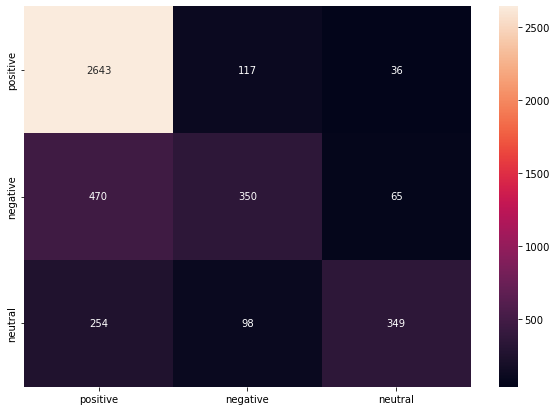

In [81]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index=[i for i in ['positive', 'negative', 'neutral']],
                     columns=[i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observations:
- The model predicted 2643 tweets as negative correctly (True Negatives).
- It incorrectly classified 117 negative tweets as positive (False Positives).
- It incorrectly classified 36 negative tweets as neutral (False Neutrals).
- The model incorrectly classified 470 positive tweets as negative (False Negatives).
- It predicted 350 tweets as positive correctly (True Positives).
- It incorrectly classified 65 positive tweets as neutral (False Neutrals).
- The model incorrectly classified 254 neutral tweets as negative (False Negatives).
- It incorrectly classified 98 neutral tweets as positive (False Positives).
- It predicted 349 tweets as neutral correctly (True Neutrals).

#### Wordcloud of top 20 important features from TF-IDF+Randomforest based mode

In [83]:
all_features = tfidf_vect.get_feature_names_out()          #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '

print(top_features)

print(" ")
print(" ")

# Generate word cloud using the top features
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,height=1000).generate(top_features.strip(', '))

thank, not, jetblue, unite, usairways, southwestair, http, great, americanair, flight, delay, virginamerica, get, hold, love, hours, cancel, dm, awesome, bag, call, service, time, wait, fly, appreciate, go, follow, hour, good, please, help, amaze, much, best, make, send, would, need, customer, 
 
 


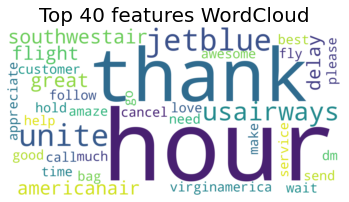

In [84]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Using LSTM

In [85]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#### Tokenizing the text column

In [97]:
# Initialize the tokenizer with vocab size of 800
vocab_size = 800
tokenizer = Tokenizer(num_words=vocab_size, split = ' ')

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(data['text'].values)

# Converting text to sequences
X = tokenizer.texts_to_sequences(data['text'].values)

# Padding the sequences
X = pad_sequences(X)

#### Encoding the target variable

In [98]:
# Storing the Label Binarizer
enc = LabelBinarizer()
# Fitting the Label Binarizer on airline_sentiment
y_encoded = enc.fit_transform(data['airline_sentiment'])

#### Split the data into train and test

In [99]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.30, random_state = 42)

#### Training LSTM Model

In [101]:
# Initializing the model
model = Sequential()

embedding_vector_length = 120    # This is the size of the embedding vector

# Adding the embedding layer with 800 vocabularies, 120 output dimension, and the input_length
model.add(Embedding(vocab_size, embedding_vector_length, input_length=X.shape[1]))

# Adding the LSTM layer with 256 neurons and return sequences set to True
model.add(LSTM(256, return_sequences=True))

# Adding the second LSTM layer with 150 neurons and dropout
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))

# Adding the dense layer with 124 neurons and relu activation function
model.add(Dense(124, activation='relu'))

# Adding dropout with a rate of 0.2
model.add(Dropout(0.2))

# Adding a dense layer with 64 neurons and relu activation function
model.add(Dense(64, activation='relu'))

# Adding the output layer with 3 neurons (for the 3 classes of sentiments) and softmax activation function
model.add(Dense(3, activation='softmax'))

# Compiling the model with categorical_crossentropy as loss function, accuracy as the metric, and adam as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
# Summary of the model
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 120)           96000     
                                                                 
 lstm (LSTM)                 (None, 21, 256)           386048    
                                                                 
 lstm_1 (LSTM)               (None, 150)               244200    
                                                                 
 dense (Dense)               (None, 124)               18724     
                                                                 
 dropout (Dropout)           (None, 124)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8000      
                                                                 
 dense_2 (Dense)             (None, 3)                

In [103]:
%%time
his = model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose = 'auto')

Epoch 1/30
320/320 [==============================] - 20s 54ms/step - loss: 0.6945 - accuracy: 0.7130
Epoch 2/30
320/320 [==============================] - 16s 50ms/step - loss: 0.5362 - accuracy: 0.7886
Epoch 3/30
320/320 [==============================] - 16s 50ms/step - loss: 0.4960 - accuracy: 0.8064
Epoch 4/30
320/320 [==============================] - 16s 51ms/step - loss: 0.4656 - accuracy: 0.8151
Epoch 5/30
320/320 [==============================] - 16s 51ms/step - loss: 0.4413 - accuracy: 0.8273
Epoch 6/30
320/320 [==============================] - 16s 51ms/step - loss: 0.4193 - accuracy: 0.8322
Epoch 7/30
320/320 [==============================] - 17s 52ms/step - loss: 0.3910 - accuracy: 0.8461
Epoch 8/30
320/320 [==============================] - 17s 53ms/step - loss: 0.3628 - accuracy: 0.8589
Epoch 9/30
320/320 [==============================] - 17s 53ms/step - loss: 0.3365 - accuracy: 0.8648
Epoch 10/30
320/320 [==============================] - 17s 54ms/step - loss: 0.307

In [104]:
# Predicting on X_test using the above model
result = model.predict(X_test)

137/137 [==============================] - 3s 18ms/step


In [106]:
# Applying argmax function on the predicted values (result) to get the predicted labels
y_pred_arg=np.argmax(result,axis=1)

# Applying argmax function on the y_test to get back the predicted labels
y_test_arg=np.argmax(y_test,axis=1)

**Plotting the confusion matrix**

[[2297  384  115]
 [ 262  521  102]
 [ 137  127  437]]


<AxesSubplot:>

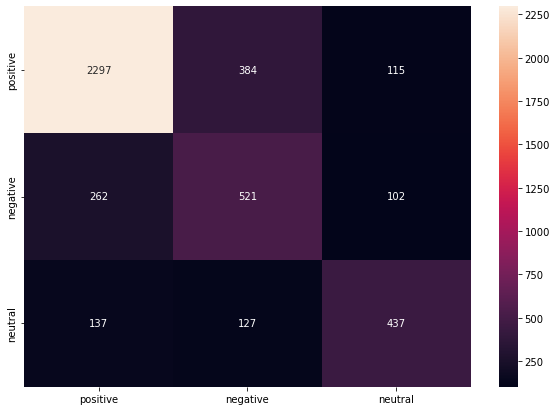

In [109]:
conf_mat = confusion_matrix(y_test_arg, y_pred_arg)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observations:
- The model predicted positive sentiment correctly 2297 times.
- The model predicted negative sentiment correctly 521 times.
- The model predicted neutral sentiment correctly 437 times.
- There are a significant number of misclassifications for positive sentiments, with 384 instances classified as negative and 115 as neutral.
- Negative sentiments also have a considerable number of misclassifications, with 262 instances classified as positive and 102 as neutral.
- Neutral sentiments are misclassified 137 times as positive and 127 times as negative.
- The model shows a strong ability to predict positive sentiments correctly, which is evident from the high number of true positives in that class.
- The model is more likely to misclassify negative and neutral sentiments as positive, suggesting a potential bias towards the positive class or an imbalance in the training data.
- The model seems to struggle more with distinguishing neutral from positive sentiments, as seen by the number of times neutral sentiments are misclassified as positive.

## Summary



-


## Happy Learning!
---